In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/austin-housing-data/austinHousingData.csv


### Import dataset

In [2]:
df = pd.read_csv('../input/austin-housing-data/austinHousingData.csv')

#### DataSet Snapshot

In [3]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


### DataSet Statistcs

In [4]:
df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


# Feature Engineering

On looking at the data provided it is easy to find some of the columns don't add much value or can't be used for regression purposes. 
These columns can be safely dropped.

In [5]:
df.drop(columns=['description', 'streetAddress', 'homeImage', 'latestPriceSource', 'zpid'], inplace=True)

The next step in the process is to convert the boolean data types to integers.

In [6]:
df['hasAssociation'] = df['hasAssociation'] * 1
df['hasGarage'] = df['hasGarage'] * 1
df['hasCooling'] = df['hasCooling'] * 1
df['hasHeating'] = df['hasHeating'] * 1
df['hasSpa'] = df['hasSpa'] * 1
df['hasView'] = df['hasView'] * 1

We then convert some of the Nominal Attributes to integers.

In [7]:
tempdf = df[["city","latestPrice", "livingAreaSqFt"]].groupby(['city']).mean()
tempdf['avgPrice'] = tempdf["latestPrice"]/tempdf["livingAreaSqFt"]
tempdf

df['city'].replace(['road', 'del valle', 'pflugerville', 'manor', 'manchaca', 'driftwood', 'dripping springs', 'austin', 'west lake hills'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

In [8]:
df["age"] = df["yearBuilt"].max() - df["yearBuilt"]
df.drop(columns=["yearBuilt"], inplace=True)
tempdf = df[["age","latestPrice", "livingAreaSqFt"]].groupby(['age']).mean()
tempdf['avgPrice'] = tempdf["latestPrice"]/tempdf["livingAreaSqFt"]


In [9]:
tempdf = df[["homeType","latestPrice", "livingAreaSqFt"]].groupby(['homeType']).mean()
tempdf['avgPrice'] = tempdf["latestPrice"]/tempdf["livingAreaSqFt"]
tempdf
df['homeType'].replace(['Mobile / Manufactured', 'Multiple Occupancy', 'Residential', 'Single Family', 'MultiFamily', 'Townhouse',  'Apartment', 'Condo', 'Vacant Land', 'Other'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

### Nominalize Dates 

In [10]:
df.drop(columns=['latest_saledate', 'latest_salemonth'], inplace=True)
df['latest_saleyear'] = df['latest_saleyear'].max() - df['latest_saleyear'] 
df[["latest_saleyear","city"]].groupby(['latest_saleyear']).count()

,city
latest_saleyear,
0,83
1,5416
2,5277
3,4395


### Simple Linear Regression

In [11]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(len(df.index))

train_data,test_data = train_test_split(df,test_size = 0.2,random_state=3)

model = linear_model.LinearRegression()
X_train = np.array(train_data['livingAreaSqFt'], dtype=pd.Series).reshape(-1,1)
Y_train = np.array(train_data['latestPrice'], dtype=pd.Series)
model.fit(X_train,Y_train)

X_test = np.array(test_data['livingAreaSqFt'], dtype=pd.Series).reshape(-1,1)
Y_test = np.array(test_data['latestPrice'], dtype=pd.Series)

Y_pred = model.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),'.3f'))
rtrsm = float(format(model.score(X_train, Y_train),'.3f'))
rtesm = float(format(model.score(X_test, Y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['livingAreaSqFt']],df['latestPrice'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
print(metrics.mean_absolute_error(Y_pred, Y_test))
evaluation

9279
126948.00178882602


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,179245.555,0.304,-,0.298,-,0.214


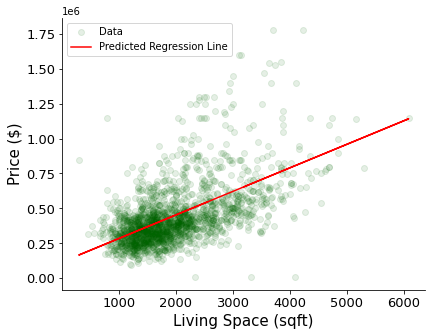

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6.5,5))
plt.scatter(X_test,Y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Multiple Regression

In [13]:
train_data,test_data = train_test_split(df,test_size = 0.2,random_state=3)

features = ['livingAreaSqFt',
'lotSizeSqFt',            
'numOfBathrooms',
'numOfBedrooms',
'numOfAccessibilityFeatures',
'numOfAppliances',
'numOfParkingFeatures',
'numOfSecurityFeatures',
'numOfWaterfrontFeatures',
'numOfWindowFeatures',
'hasCooling',
'hasGarage',
'hasHeating',
'hasSpa',
'hasView',
'zipcode',
'latitude',
'longitude',
'age',
'latest_saleyear',
'homeType',
'city',
'numOfPrimarySchools',
'numOfElementarySchools',
'numOfMiddleSchools',
'numOfHighSchools'
]

model = linear_model.Lasso(alpha=1)
X_train = np.array(train_data[features], dtype=pd.Series)
Y_train = np.array(train_data['latestPrice'], dtype=pd.Series)
model.fit(X_train,Y_train)

X_test = np.array(test_data[features], dtype=pd.Series)
Y_test = np.array(test_data['latestPrice'], dtype=pd.Series)

Y_pred = model.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),'.3f'))
rtrsm = float(format(model.score(X_train, Y_train),'.3f'))
rtesm = float(format(model.score(X_test, Y_test),'.3f'))
cv = float(format(cross_val_score(model,df[features],df['latestPrice'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
print(metrics.mean_absolute_error(Y_pred, Y_test))
evaluation

114472.72325121769


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,179245.555,0.304,-,0.298,-,0.214
1,Simple Linear Regression,-,166135.167,0.494,-,0.397,-,0.335


In [14]:
from sklearn.preprocessing import PolynomialFeatures
train_data,test_data = train_test_split(df,test_size = 0.2,random_state=3)

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Lasso().fit(X_trainpoly, train_data['latestPrice'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['latestPrice'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['latestPrice']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['latestPrice']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['latestPrice'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
print(metrics.mean_absolute_error(pred1, test_data['latestPrice']))
evaluation

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.270e+13, tolerance: 4.172e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


190001.80972842904


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,179245.555,0.304,-,0.298,-,0.214
1,Simple Linear Regression,-,166135.167,0.494,-,0.397,-,0.335
2,Polynomial Regression,"degree=2, selected features, no preprocessing",3400208.103,0.556,-,-251.532,-,-18.012


In [15]:
import folium
from folium.plugins import HeatMap

# find the row of the house which has the highest price
maxpr=df.loc[df['latestPrice'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['latitude'], maxpr['longitude']],popup='Highest Price: $'+str(format(maxpr['latestPrice'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['latitude','longitude','count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap